In [1]:
# import time
# st = time.time()

from img2table.document import Image
from img2table.ocr import PaddleOCR
import pandas as pd
import numpy as np
import cv2
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image as PIL_Image, ImageDraw

images = convert_from_path('D:/github/Auto_Excel_Mark_Entry/Codes/image to table/new_exm.pdf') # change or give PDF name here....................new_exm.pdf

for i in range(len(images)):
    img = images[i].convert('L') # convert('L') for gray scaling
    _, height = img.size
    cropped_img = img.crop((150, height / 2 + 50, 1600, height - 300)) # left, top, right, bottom
    cropped_img.save(f"D:/github/Auto_Excel_Mark_Entry/Codes/image to table/temp/ima{i}.jpg")

# ----------------------------------------------------------------------------------------------------------------------------------    
a=0
for i in range(1,3):
#for i in range(len(images)):
    ## Image opening & performing OCR
    paddle_ocr = PaddleOCR(lang="en")
    src = f"D:/github/Auto_Excel_Mark_Entry/Codes/image to table/temp/ima{i}.jpg"

    doc = Image(src, dpi=200)
    extracted_tables = doc.extract_tables(ocr=paddle_ocr, implicit_rows=True, min_confidence=50)

    # Load the image using PIL
    img = PIL_Image.open(src) # comment this --------------------------------------------------

    # Create a draw object
    draw = ImageDraw.Draw(img) # comment this --------------------------------------------------

    for table in extracted_tables:
        for row in table.content.values():
            for cell in row:
                draw.rectangle((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2), outline="red", width=3)
                
    img.save(f"D:/github/Auto_Excel_Mark_Entry/Codes/image to table/temp/img{i}_with_redlines{i}.jpg")# comment this --------------------------------------------------

    for table in extracted_tables:
        for row in table.content.values():
        #print(row)
            for cell in row:
#                 print(cell.bbox.x1)
                crp=img.crop((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2))
                #crp1=crp.resize((30,30))
#            # plt.imshow(crp)
                crp.save(f"D:/github/Auto_Excel_Mark_Entry/Codes/image to table/crp1/ima{a}.jpg")
                a+=1


# print(time.time() - st)

62
161
260
360
460
559
658
756
856
956
1056
1155
1256
62
161
260
360
460
559
658
756
856
956
1056
1155
1256
62
161
260
360
460
559
658
756
856
956
1056
1155
1256
62
161
260
360
460
559
658
756
856
956
1056
1155
1256
62
161
260
360
460
559
658
756
856
956
1056
1155
1256


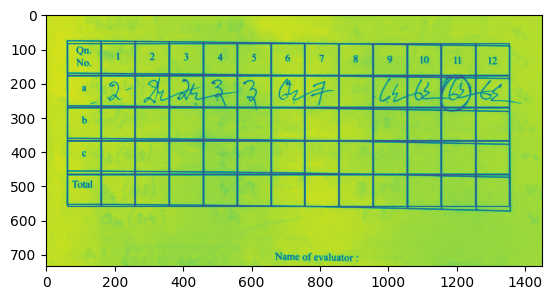

In [6]:
plt.imshow(img)
i=0
for table in extracted_tables:
    for row in table.content.values():
        #print(row)
        for cell in row:
#             print(cell.bbox.x1)
            crp=img.crop((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2))
#            # plt.imshow(crp)
            crp.save(f"D:/github/Auto_Excel_Mark_Entry/Codes/image to table/crp/ima{i}.jpg")
            i+=1

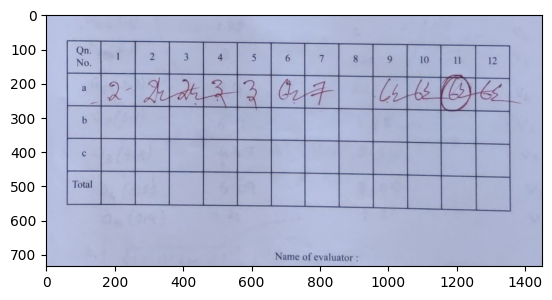

In [9]:
import matplotlib.pyplot as plt
plt.imshow(cropped_img)

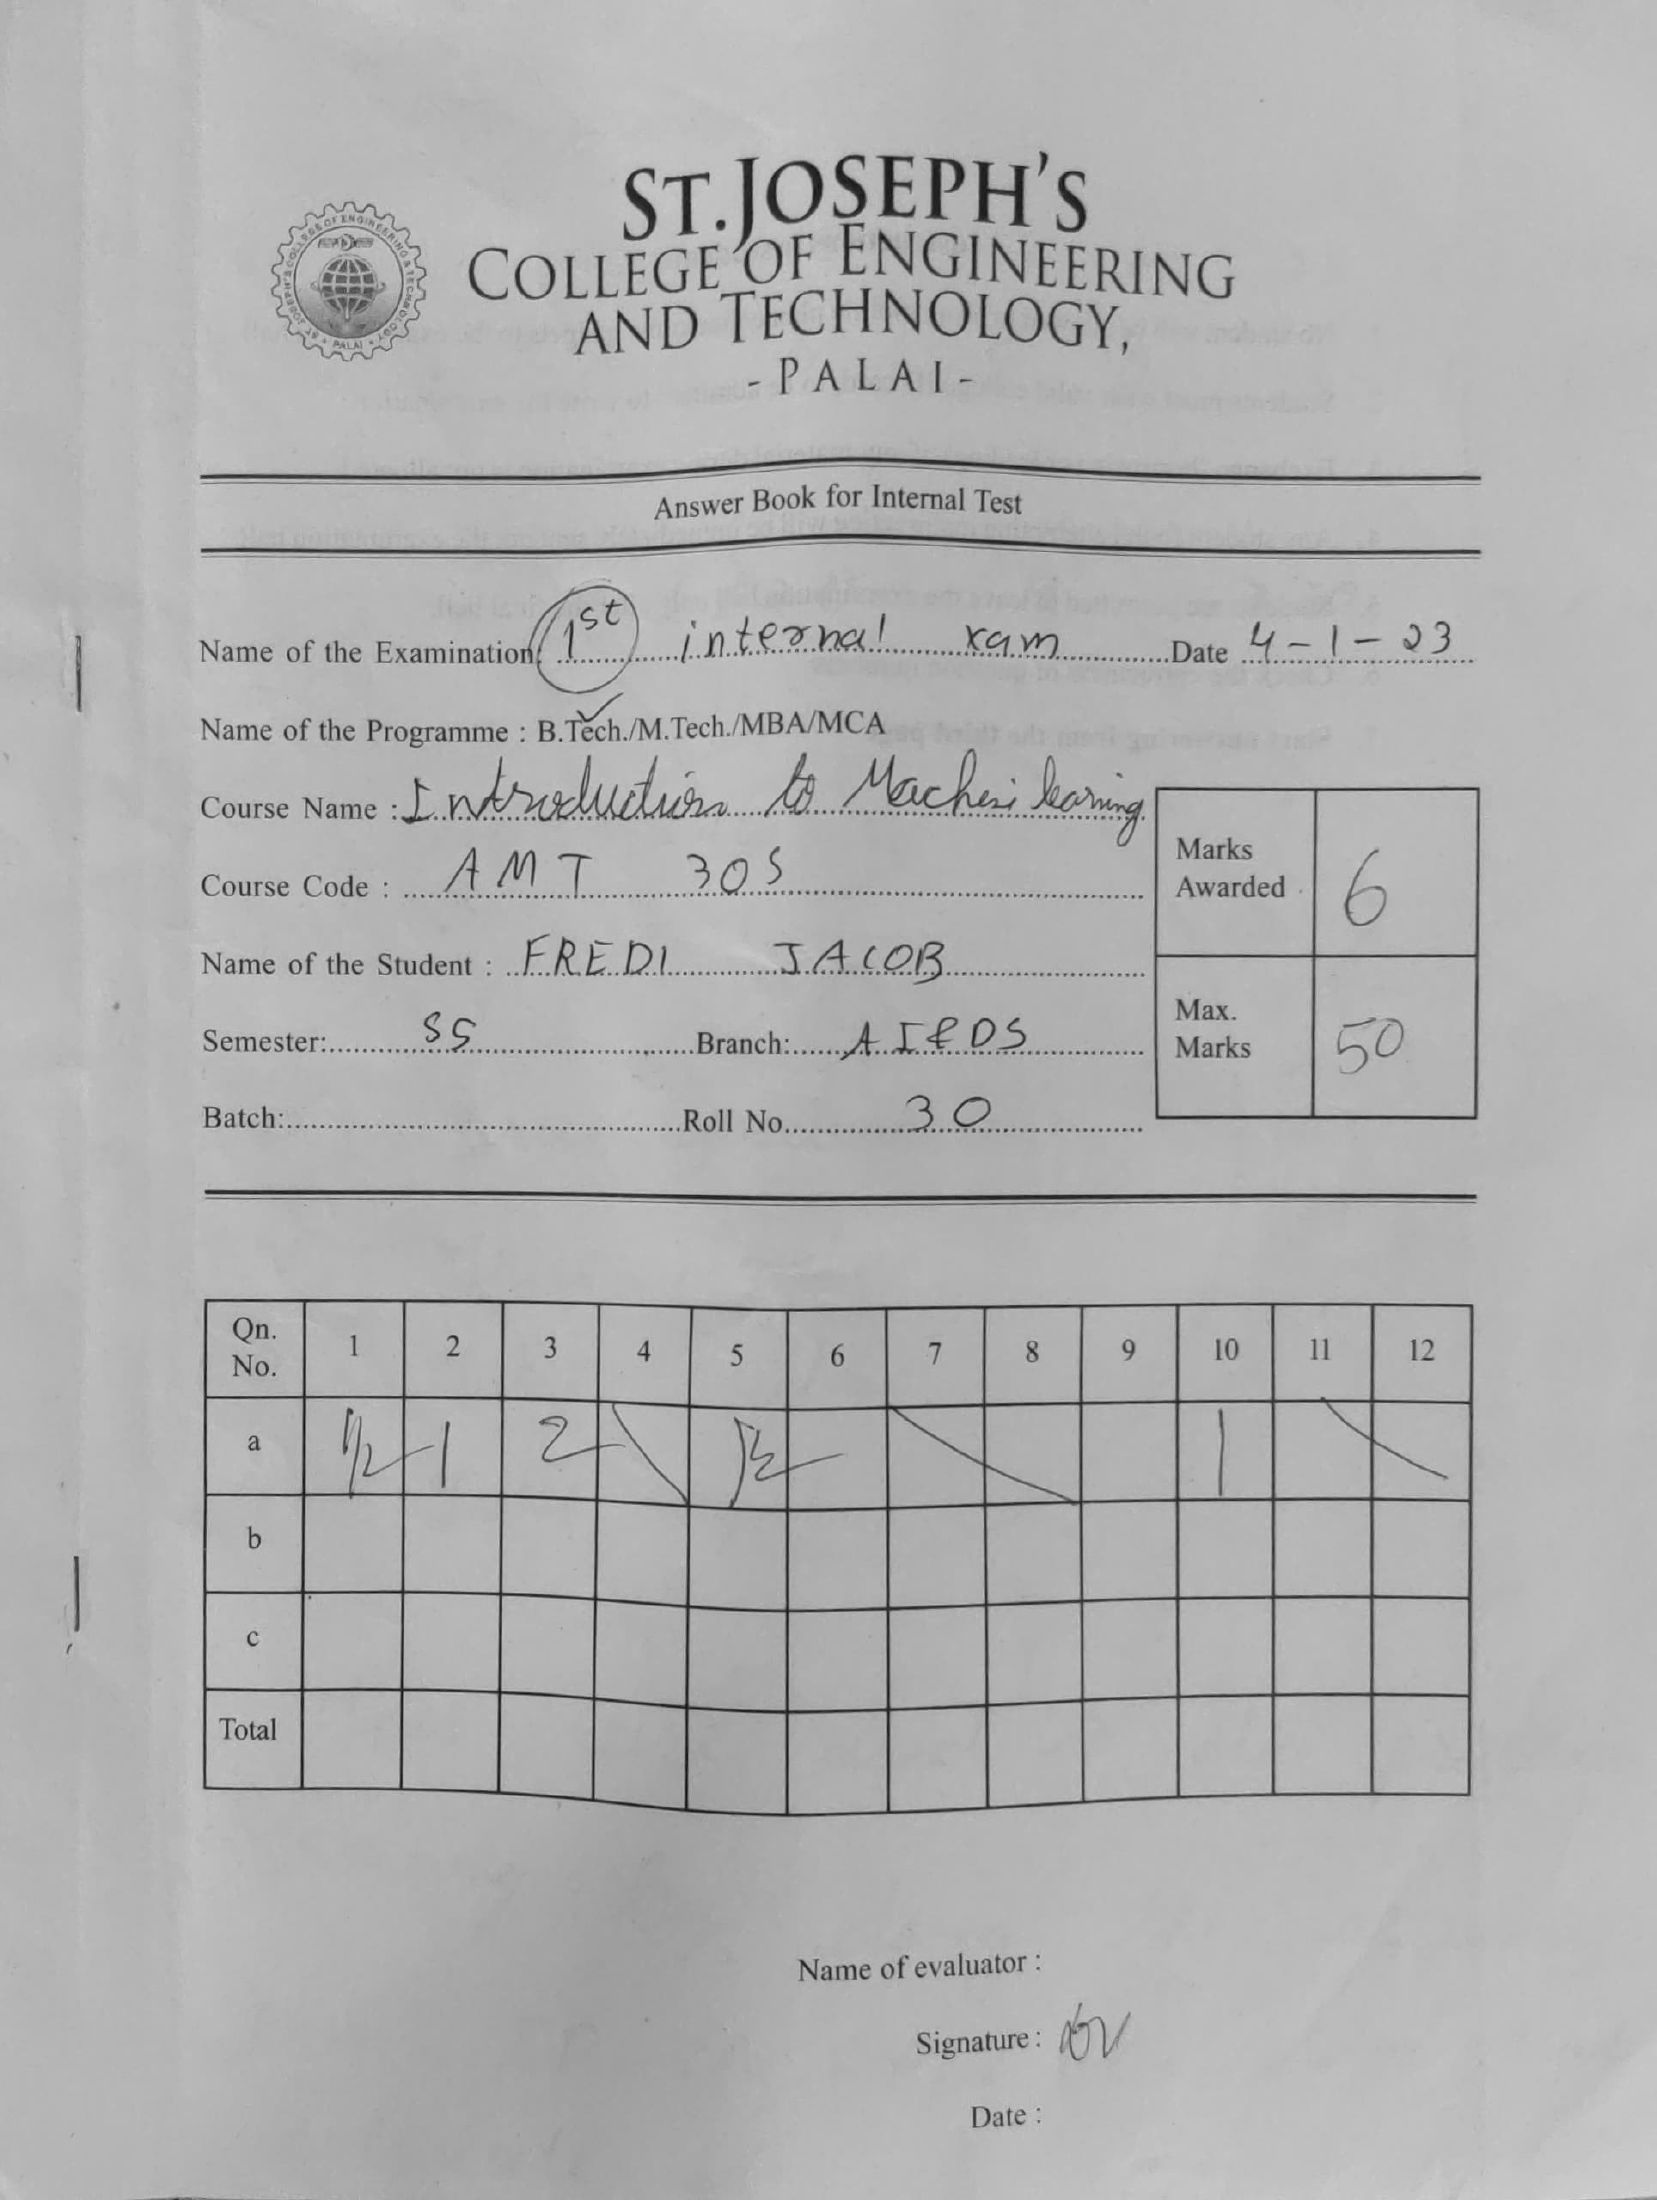

In [4]:
ima.convert('L')

AttributeError: shape